Лабораторна робота №7
Любченко Мирослави

Завдання

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. 

2. Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

3. Написати функції:
* для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту  та результат оцінки рівності дисперсій (significant або not significant).

* для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

4. Перевірити розбіжність на між групами на даних з п. 1. 

In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
table1=[]
table1 = [90,29,39,79,88,53,34,40,75,79]
table2=[]
table2 = [41,49,56,64,72,65,63,87,77,62]
df = pd.DataFrame({
    'Первый класс': table1,
    'Второй класс': table2
}, index=np.arange(1, len(table1)+1))
df.columns.name = 'Тестовые оценки'
df.index.name = '№ учащихся'
df

Тестовые оценки,Первый класс,Второй класс
№ учащихся,,
1,90,41
2,29,49
3,39,56
4,79,64
5,88,72
6,53,65
7,34,63
8,40,87
9,75,77


[]

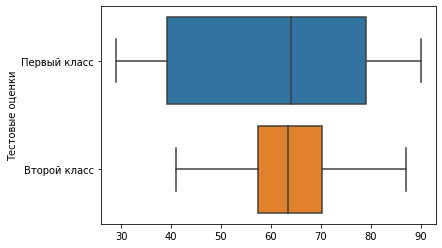

In [3]:
sns.boxplot(data=df, orient='h').set()

In [66]:
def sd(massiv,n):
    s=0
    mean=(sum(massiv))/n
    for i in range (n):
        s+=((massiv[i]-mean))**2
    return s/(n-1)
def livenia(x,y):
    n=len(x)
    m=len(y)
    s1=sd(x,n)
    s2=sd(y,m)
    if s1>s2:
        f=s1/s2
    else:
        f=s2/s1
    print('Отримане значення критерію Лівеня : F = ' + str(f))
    df1=n-1
    df2=m-1
    print('Значення ступенів свободи: df1 = ' + str(df1) + "; df2 = " + str(df2))
    table = pd.read_excel("Таблиця критичних значень для критерію Лівеня.xlsx").iloc[df1,df2]
    print("Критичне значення критерію Лівеня = " + str(table))
    if f<table:
        result = "Оскільки значення критерію Лівеня менше, ніж його критичне значення, то результат оцінки значимості зв'зку - not significant"
    else:
        result = "Оскільки значення критерію Лівеня більше, ніж його критичне значення, то результат оцінки значимості зв'зку -  significant"
    return result


In [67]:
def t_criterion(x,y,flag):
    if flag=="significant":
        n=len(x)
        m=len(y)
        s1=sd(x,n)
        s2=sd(y,m)
        m1=sum(x)/n
        m2=sum(y)/n
        df=n+m-2
        t=(abs(m1-m2))/(math.sqrt((s1/n)+(s2/m)))
    elif flag=="not significant":
        n=len(x)
        m=len(y)
        s1=sd(x,n)
        s2=sd(y,m)
        m1=sum(x)/n
        m2=sum(y)/n
        df1=n-1
        df2=m-1
        df=n+m-2
        k=(1/n)+(1/m)
        t=(abs(m1-m2))/(math.sqrt(((df1*s1+df2*s2)/df)*k))
    else:
        return "You input the wrong flag"
    print('Отримане значення критерію Стьюдента: t = ' + str(t))
    print('Значення ступеня свободи: df = ' + str(df))
    table = pd.read_excel("Таблиця критичних значень для критерію Стьюдента.xlsx").iloc[df-1,1]
    print("Критичне значення критерію Стьюдента = " + str(table))
    if t<table:
        result = "Оскільки значення критерію Стьюдента менше, ніж його критичне значення, то результат оцінки значимості зв'зку - not significant"
    else:
        result = "Оскільки значення критерію Стьюдента більше, ніж його критичне значення, то результат оцінки значимості зв'зку -  significant"
    return result

In [68]:
livenia(table1,table2)

Отримане значення критерію Лівеня : F = 3.253218884120172
Значення ступенів свободи: df1 = 9; df2 = 9
Критичне значення критерію Лівеня = 3.18


"Оскільки значення критерію Лівеня більше, ніж його критичне значення, то результат оцінки значимості зв'зку -  significant"

In [69]:
t_criterion(table1,table2,"significant")

Отримане значення критерію Стьюдента: t = 0.3466979117865551
Значення ступеня свободи: df = 18
Критичне значення критерію Стьюдента = 2.101


"Оскільки значення критерію Стьюдента менше, ніж його критичне значення, то результат оцінки значимості зв'зку - not significant"